In [1]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


In [2]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

In [3]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [4]:
print(y_pred)

[1]


In [5]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [7]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))

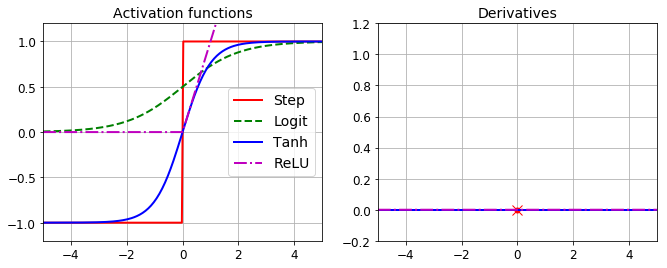

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])


plt.show()

In [11]:
def heaviside(z):
    return(z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mpl_xor(x1, x2, activation):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5)- 0.5)

In [26]:
reset_graph()
import tensorflow as tf 

In [27]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.mnist.load_data()

In [28]:

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [29]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hh/jmwz958n241f4kz38dk87g0c0000gn/T/tmpt2kyt7mg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11620b0f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 i

INFO:tensorflow:loss = 1.1315566, step = 7101 (0.185 sec)
INFO:tensorflow:global_step/sec: 537.68
INFO:tensorflow:loss = 1.8598161, step = 7201 (0.186 sec)
INFO:tensorflow:global_step/sec: 502.798
INFO:tensorflow:loss = 0.56489617, step = 7301 (0.198 sec)
INFO:tensorflow:global_step/sec: 532.121
INFO:tensorflow:loss = 0.21165642, step = 7401 (0.188 sec)
INFO:tensorflow:global_step/sec: 632.023
INFO:tensorflow:loss = 1.8827578, step = 7501 (0.158 sec)
INFO:tensorflow:global_step/sec: 581.23
INFO:tensorflow:loss = 0.6206346, step = 7601 (0.172 sec)
INFO:tensorflow:global_step/sec: 528.387
INFO:tensorflow:loss = 0.909755, step = 7701 (0.190 sec)
INFO:tensorflow:global_step/sec: 576.905
INFO:tensorflow:loss = 0.8986025, step = 7801 (0.173 sec)
INFO:tensorflow:global_step/sec: 515.791
INFO:tensorflow:loss = 0.18610582, step = 7901 (0.195 sec)
INFO:tensorflow:global_step/sec: 572.482
INFO:tensorflow:loss = 2.3540425, step = 8001 (0.174 sec)
INFO:tensorflow:global_step/sec: 581.882
INFO:tenso

INFO:tensorflow:loss = 0.3724252, step = 15301 (0.186 sec)
INFO:tensorflow:global_step/sec: 506.816
INFO:tensorflow:loss = 0.01652174, step = 15401 (0.198 sec)
INFO:tensorflow:global_step/sec: 463.118
INFO:tensorflow:loss = 0.048229024, step = 15501 (0.216 sec)
INFO:tensorflow:global_step/sec: 503.486
INFO:tensorflow:loss = 0.09291142, step = 15601 (0.198 sec)
INFO:tensorflow:global_step/sec: 516.012
INFO:tensorflow:loss = 0.17507721, step = 15701 (0.194 sec)
INFO:tensorflow:global_step/sec: 531.366
INFO:tensorflow:loss = 0.069611244, step = 15801 (0.188 sec)
INFO:tensorflow:global_step/sec: 516.691
INFO:tensorflow:loss = 0.0302285, step = 15901 (0.193 sec)
INFO:tensorflow:global_step/sec: 534.994
INFO:tensorflow:loss = 0.19514005, step = 16001 (0.187 sec)
INFO:tensorflow:global_step/sec: 565.09
INFO:tensorflow:loss = 0.12501149, step = 16101 (0.177 sec)
INFO:tensorflow:global_step/sec: 510.114
INFO:tensorflow:loss = 0.0066677704, step = 16201 (0.196 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 523.966
INFO:tensorflow:loss = 0.0017250853, step = 23501 (0.191 sec)
INFO:tensorflow:global_step/sec: 619.794
INFO:tensorflow:loss = 0.0740066, step = 23601 (0.161 sec)
INFO:tensorflow:global_step/sec: 634.723
INFO:tensorflow:loss = 0.0039240792, step = 23701 (0.158 sec)
INFO:tensorflow:global_step/sec: 596.912
INFO:tensorflow:loss = 0.08328403, step = 23801 (0.167 sec)
INFO:tensorflow:global_step/sec: 639.894
INFO:tensorflow:loss = 0.019038768, step = 23901 (0.156 sec)
INFO:tensorflow:global_step/sec: 568.056
INFO:tensorflow:loss = 0.099261746, step = 24001 (0.177 sec)
INFO:tensorflow:global_step/sec: 577.167
INFO:tensorflow:loss = 0.025104921, step = 24101 (0.173 sec)
INFO:tensorflow:global_step/sec: 641.481
INFO:tensorflow:loss = 0.22337517, step = 24201 (0.156 sec)
INFO:tensorflow:global_step/sec: 570.708
INFO:tensorflow:loss = 0.012875543, step = 24301 (0.175 sec)
INFO:tensorflow:global_step/sec: 632.375
INFO:tensorflow:loss = 0.05399529, step = 2

INFO:tensorflow:global_step/sec: 606.498
INFO:tensorflow:loss = 0.02637487, step = 31601 (0.165 sec)
INFO:tensorflow:global_step/sec: 604.124
INFO:tensorflow:loss = 0.02379985, step = 31701 (0.165 sec)
INFO:tensorflow:global_step/sec: 608.31
INFO:tensorflow:loss = 0.0802624, step = 31801 (0.164 sec)
INFO:tensorflow:global_step/sec: 579.307
INFO:tensorflow:loss = 0.04108536, step = 31901 (0.173 sec)
INFO:tensorflow:global_step/sec: 508.513
INFO:tensorflow:loss = 0.02616093, step = 32001 (0.196 sec)
INFO:tensorflow:global_step/sec: 565.783
INFO:tensorflow:loss = 0.02336318, step = 32101 (0.177 sec)
INFO:tensorflow:global_step/sec: 591.108
INFO:tensorflow:loss = 0.00725801, step = 32201 (0.169 sec)
INFO:tensorflow:global_step/sec: 577.574
INFO:tensorflow:loss = 0.021750614, step = 32301 (0.173 sec)
INFO:tensorflow:global_step/sec: 563.612
INFO:tensorflow:loss = 0.017784856, step = 32401 (0.178 sec)
INFO:tensorflow:global_step/sec: 546.607
INFO:tensorflow:loss = 0.02345711, step = 32501 (0

INFO:tensorflow:global_step/sec: 539.127
INFO:tensorflow:loss = 0.017563744, step = 39701 (0.186 sec)
INFO:tensorflow:global_step/sec: 518.6
INFO:tensorflow:loss = 0.004879594, step = 39801 (0.193 sec)
INFO:tensorflow:global_step/sec: 506.616
INFO:tensorflow:loss = 0.071541846, step = 39901 (0.197 sec)
INFO:tensorflow:global_step/sec: 564.586
INFO:tensorflow:loss = 0.028968228, step = 40001 (0.177 sec)
INFO:tensorflow:global_step/sec: 504.885
INFO:tensorflow:loss = 0.0020459513, step = 40101 (0.198 sec)
INFO:tensorflow:global_step/sec: 524.31
INFO:tensorflow:loss = 0.00824243, step = 40201 (0.191 sec)
INFO:tensorflow:global_step/sec: 532.611
INFO:tensorflow:loss = 0.0097860405, step = 40301 (0.188 sec)
INFO:tensorflow:global_step/sec: 544.511
INFO:tensorflow:loss = 0.009858922, step = 40401 (0.183 sec)
INFO:tensorflow:global_step/sec: 500.286
INFO:tensorflow:loss = 0.01321987, step = 40501 (0.200 sec)
INFO:tensorflow:global_step/sec: 551.492
INFO:tensorflow:loss = 0.009658465, step = 4

In [30]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-13:28:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hh/jmwz958n241f4kz38dk87g0c0000gn/T/tmpt2kyt7mg/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-13:28:11
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9792, average_loss = 0.10083863, global_step = 44000, loss = 12.764383
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/hh/jmwz958n241f4kz38dk87g0c0000gn/T/tmpt2kyt7mg/model.ckpt-44000


In [31]:
eval_results

{'accuracy': 0.9792,
 'average_loss': 0.10083863,
 'loss': 12.764383,
 'global_step': 44000}

In [57]:
reset_graph()

In [58]:

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_hidden3 = 100
n_hidden4 = 100
n_outputs = 10

In [59]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [60]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [61]:
with tf.name_scope("dnn"):
    hidden1= neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2= neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    hidden3= neuron_layer(hidden2, n_hidden3, name="hidden3", activation=tf.nn.relu)
    hidden4= neuron_layer(hidden3, n_hidden4, name="hidden4", activation=tf.nn.relu)
    logits= neuron_layer(hidden4, n_outputs, name="outputs")

In [62]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss= tf.reduce_mean(xentropy, name="loss")

In [63]:
learning_rate= 0.01
with tf.name_scope("train"):
    optimizer= tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [64]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [65]:
init = tf.global_variables_initializer()
saver=tf.train.Saver()
n_epochs=40
batch_size=50

In [66]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [67]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch= accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch Accuracy", acc_batch, "Val accuracy:", acc_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")
        

0 Batch Accuracy 0.98 Val accuracy: 0.926
1 Batch Accuracy 0.94 Val accuracy: 0.952
2 Batch Accuracy 0.96 Val accuracy: 0.9594
3 Batch Accuracy 0.94 Val accuracy: 0.9616
4 Batch Accuracy 0.98 Val accuracy: 0.9646
5 Batch Accuracy 0.98 Val accuracy: 0.962
6 Batch Accuracy 1.0 Val accuracy: 0.9678
7 Batch Accuracy 1.0 Val accuracy: 0.9714
8 Batch Accuracy 1.0 Val accuracy: 0.9708
9 Batch Accuracy 0.98 Val accuracy: 0.9706
10 Batch Accuracy 1.0 Val accuracy: 0.9738
11 Batch Accuracy 1.0 Val accuracy: 0.9726
12 Batch Accuracy 0.98 Val accuracy: 0.9722
13 Batch Accuracy 1.0 Val accuracy: 0.9744
14 Batch Accuracy 1.0 Val accuracy: 0.9756
15 Batch Accuracy 1.0 Val accuracy: 0.976
16 Batch Accuracy 1.0 Val accuracy: 0.9772
17 Batch Accuracy 1.0 Val accuracy: 0.9784
18 Batch Accuracy 1.0 Val accuracy: 0.9772
19 Batch Accuracy 1.0 Val accuracy: 0.977
20 Batch Accuracy 1.0 Val accuracy: 0.9764
21 Batch Accuracy 1.0 Val accuracy: 0.9776
22 Batch Accuracy 1.0 Val accuracy: 0.9792
23 Batch Accuracy 

In [54]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final_ckpt")
    X_new_scaled= X_test[:20]
    Z=logits.eval(feed_dict={X: X_new_scaled})
    y_pred= np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final_ckpt


In [55]:
print("Predicted Classes:", y_pred)
print("Actual Classes:", y_test[:20])

Predicted Classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual Classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [68]:
file_writer= tf.summary.FileWriter("tf_logs/DNN2", tf.get_default_graph())